# Clustering I: El problema del Pintor (Color Quantization)

### Miguel Gutierrez
### David Martinez
Un estudiante de pintura quiere realizar un cuadro como trabajo final de su curso. Entre los cuadros que puede escoger para el proyecto se encuentran:

* El jardín de las Delicias de Bosch
* El nacimiento de Enuza de Botticelli
* La persistencia de la memoria de Dalí.
* La Flor de Loto de Monet
* Las señoritas de Aviñón de Picasso.
* La noche estrellada de Van Gogh
* Las Meninas de Velázquez
* La chica de la perla de Vermeer

Sin embargo, debido a la situación de la cuarentena tiene mucho trabajo. Él quiere un cuadro donde no tenga que utilizar más de 15 tonos diferentes, además quiere saber cómo se vería el cuadro resultante utilizando solamente esos 15 tonos. Él ha escuchado que los alumnos de MACC pueden colaborarle utilizando algunas técnicas de Machine Learning. Es por esto por lo que él ha pedido nuestra ayuda.


### Pregunta 1

**¿Qué puede observar de los datos del problema?**

- Se puede observar que la imagen posee 3 componentes, donde cada componente define un color de la escala RGB (Rojo, Verde, Azul). Además, cada componente tiene un valor flotante entre 0 y 255 indicando la intensidad del color. Por otro lado, algunas imágenes tienen una cantidad inmensa de pixeles (alta resolución), lo cual conlleva a un problema ya que se obtendrían matrices de datos gigantescas.

### Pregunta 2

**¿Se tuvo que realizar algún tipo de transformación a los datos?, ¿Por qué?**

- Si, se tuvo que realizar una transformación a los datos, esto pues es necesario para que el algoritmo de K-means pueda aprender correctamente las agrupaciones de los diferentes colores que representan la imagen. Se convirtió la imagen que es un tensor de (Ancho $\cdot$ Altura $\cdot$ 3), donde el 3 corresponde a cada componente RGB a una matriz de (Ancho $\cdot$ altura,3). La razón de este cambio de dimensiones es que pasamos a ver cada píxel de la imagen como un registro y cada componente RGB como un descriptor.

- Por otro lado, debemos contar con el hecho de que no tenemos una potencia infinita en nuestros computadores caseros, de hecho, es bastante limitada a la hora de hacer operaciones con matrices tan gigantescas. Por esta razón optamos por hacer diversos análisis sobre una versión de cada imagen reducida, dándonos cuenta de que ganamos muchísimo en cuanto aprovechamiento de recursos computacionales y no se pierde mucha información de los datos. Mas adelante veremos que la resolución de la imagen si influye en la clusterización de los datos.

- Finalmente, debemos hablar sobre la normalización de los datos, pues esto es importantísimo para llegar a algún tipo de transformación que el algoritmo de k-means pueda clusterizar mejor (círculos y elipsoides). Nos dimos cuenta de que la forma en la que entran los datos puede ser incluso más importante que el algoritmo mismo, puesto que llevar los datos a una forma en la que los datos sean fácilmente separados conlleva a una rápida convergencia de K-means.

    - Algunas imágenes presentan mayor dificultad para ser clusterizadas que otras, como es el caso de La Flor de Loto de Monet en el que hay unos tonos rojizos muy poco frecuentes en comparación al tono azulado y verdoso que acapara más del 90% de la imagen. Para esto investigamos otro método para pre procesar las matrices y poder lidiar un poco con el desbalanceo tan grande de color que se presenta (pre-whitening)
    - Blanquear los datos es el proceso de transformar los datos en un nuevo conjunto de datos cuya varianza es 1 y la matriz de covarianzas es nula, es decir que no tienen correlación alguna entre ellos.
    - Usamos otros métodos de normalización de los datos como restarle la media y dividir por su varianza (estándar) y multiplicar por la matriz de covarianzas para esferificar los datos.


### Pregunta 3

**¿Cuál fue el criterio para escoger la pintura que recomendará al estudiante para pintar?**

- La idea es que la imagen escogida sea lo más parecida posible a la imagen original. Para esto usamos una función de perdida basada en la comparación píxel a píxel con norma L2. y, por otro lado, la función de costo de error cuadrático medio que nos da buenos indicios acerca del error generado.

- Sin embargo, no hay que dejarse guiar solamente por el puntaje de la función de perdida, pues hay imágenes como La Flor de Loto de Monet, que presenta muy buenos resultados al primer intento, pero a la hora de visualizarla manualmente, no es muy parecida a original(ausencia de colores esenciales). Vemos que esta imagen es en su gran mayoría azul, y esto lo entiende k-means haciendo grupos muy cercanos a los tonos de azul y verde pero un componente importantísimo de esta imagen es el componente rojo, que, aunque es muy mínimo en comparación a los demás componentes, este genera una distinción visual en la imagen. Por lo tanto, es mejor aplicar una normalización con la matriz de covarianzas o aplicar whitening.
    - Al normalizar los datos por covarianzas se ve la aparición de tonos rojizos en los centroides de k-means y por lo tanto, más parecida a la imagen original según el ojo humano a pesar de que la función de costo y función L2 aumentaron considerablemente.

### Pregunta 4

**¿El algoritmo tuvo un performance similar para todas las pinturas, o no?, ¿Por qué se comportó así?**

- No siempre tuvo un performance similar, observe que el performance del algoritmo reside en la resolución de la imagen y la varianza de los colores (datos). AL hacer diferentes pruebas, encontramos que imágenes con mayor resolución (cantidad de muestra) presentan menor función de costo. Por otro lado, la varianza influye puesto que estamos trabajando con una gamma de 255 colores y clasificarlo en 15 grupos es bastante pequeño si tenemos una imagen con una variabilidad de color muy grande (extremos en la paleta de colores). Dado el caso, es probable que el algoritmo falle en representar la imagen original con solo 15 colores.

- Las imágenes que tuvieron mejores resultados en 15 colores fueron: **La chica de la perla de Vermeer**, **las Meninas de Velázquez** y **La noche estrellada de Van Gogh**. Para nosotros la ganadora es **Las Meninas Velázquez** ya que además de presentar la menor función de costo, utilizando nuestro ojo humano concluimos que si tienen muy buena similitud.

- A manera de conclusión, la razón por la cual las pinturas ganadoras tuvieron tan buenos resultados se debió a una variabilidad de los datos(colores) muy baja. Por ejemplo, en la pintura de Velázquez se puede ver que maneja solo tonos bastante oscuros, incluso se podría decir que tiene casi solo tonos de grises y cafés, añadiendo que tiene una muy buena resolución.

### Pregunta 5

**¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los métodos de clusterización y como se aplicó en este proyecto.**

- La estandarización de los datos es importante, puesto que esto repercute en resultados muy diferentes para algoritmo K-means.

- Visualizar los datos en este caso en 2D y 3D nos permite ver:
    - Que tan distribuidos se encuentran los centroides del K-means y con esto saber si el algoritmo está identificando colores con distancias mayores.

    - Que tan dispersos se encuentran los datos y que forma tiene la distribución de los datos. Lo que nos permite determinar en qué componente de color se encuentran datos.
    
- El algoritmos k means es bueno en agrupar grupos de los cuales uno desea dividir ciertos datos. Además una posible aplicación en las pinturas es que al disminuir el numero de colores necesarios para representar una imagen permite reducir el tamaño de la imagen sin que ocupe mucho espacio.

- Es posible que si se mapean los colores a otro rango de mapas como el HSV, se pueda aprender mucho mejor sobre los grupos de la imagen.

- Aunque el algoritmo k means funciona muy bien, es necesario compararlo con otros algoritmos de clustering para escoger cual posiblemente es mejor.

- La resolución de una imagen asi como la distribucion de los colores afecta como el algoritmo pueda aprender sobre los datos.

- Si bien el algoritmo funciona muy bien, es necesario tener otras perspectivas como la del ojo humano o de un experto que nos sugiera cual es la mejor de todas, o en que colores habria que enfocarse para maximizar la representacion de la pintura.

- **Opinion:** Si bien es cierto los algoritmos de clustering son muy buenos determinando grupos, es mucho mejor conocer con anterioridad que posibilidad de grupos existen y si es posible aplicar un algoritmo de clasificacion enfocado a reconocer los diferentes agrupamientos.

- En nuestro proyecto como se puede ver se hicieron diferentes transformaciones/estandarizaciones de los datos para ver si algoritmo trabaja mejor bajo estos cambios. Sin embargo el mejor algoritmo terminaba siendo la estandarización de dividir por el dato maximo de los datos 255.

In [37]:
import cv2 as cv
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Codigo y exploración de datos

## Pre-Whitening

Debido a que encontramos un problema en la pintura de monet donde no mostraba los colores rojos, decidimos investigar de mas y ver como lo podiamos solucionar. Primero normalizamos los datos

$$X =\frac{\# pixeles}{255}$$

$X$ son los datos normalizados, luego aplicamos la funcion de Whitening la cual corresponde a 

$$\boldsymbol{X}_{Z C A}=\boldsymbol{U} \cdot \operatorname{diag}\left(\frac{1}{\sqrt{\operatorname{diag}(\boldsymbol{S})+\epsilon}}\right) \cdot \boldsymbol{U}^{\mathrm{T}} \cdot \boldsymbol{X}$$

donde

$$\operatorname{diag}\left(\frac{1}{\sqrt{\operatorname{diag}(\boldsymbol{S})+\epsilon}}\right)$$

In [3]:
#Esta funcion hace preprocecamiento de la imagen con la tecnica prewhitening y si se quiere, dibuja la imagen orignal
# vs la imagen preprocesada y las respectivas dispersiones; si quiere dibujar, debe agregar un parametro adicional(tamaño de la imagen original)
# tambien recibe un epsilon, el hiperparametro llamado coeficiente de prewhitening
def pre_whitening(image,whitening_param,plot,o_s=None):
    
    # Normalization
    X_norm = image/255
    X_norm = X_norm - X_norm.mean(axis=0)
    cov = np.cov(X_norm, rowvar=False)
    U,S,V = np.linalg.svd(cov)
    X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + whitening_param))).dot(U.T).dot(X_norm.T).T
    X_ZCA_rescaled = ((X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())) #Valores entre 0 y 1
    #print(image)
    if plot:
        X_ZCA_rescaled_r = X_ZCA_rescaled.reshape(o_s)
        image_r = image.reshape(o_s)

        vec = [(image_r,"Original"),(X_ZCA_rescaled_r,f"Prewhitened e = {whitening_param}"),(image,"Original"),(X_ZCA_rescaled,f"Prewhitened e = {whitening_param}")]
        axes = []
        fig = plt.figure(figsize = (15,15))
        for i in range(2):
            axes.append(fig.add_subplot(1,2,i+1))
            axes[-1].set_title(vec[i][1])
            plt.imshow(vec[i][0])
        plt.show()     
        fig = plt.figure(figsize = (15,15))
        for i in range(2,4):
            axes.append(fig.add_subplot(1,2,i-1, projection='3d',xlabel="RED",ylabel="GREEN",title=vec[i][1]))
            axes[-1].set_title(vec[i][1])
            axes[i].scatter(vec[i][0][:,0],vec[i][0][:,1],vec[i][0][:,2],marker='o')
        plt.show()
    return X_ZCA_rescaled



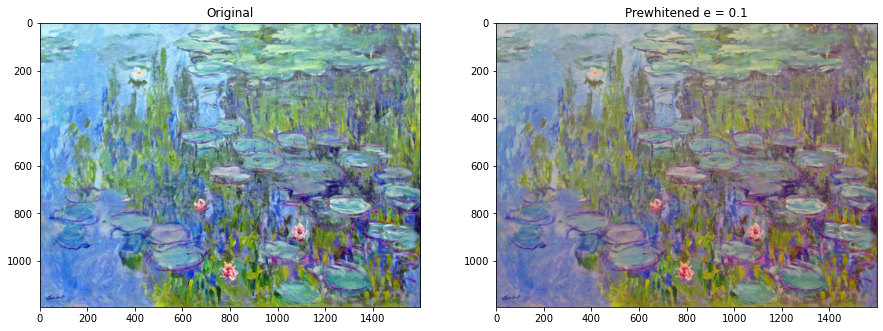

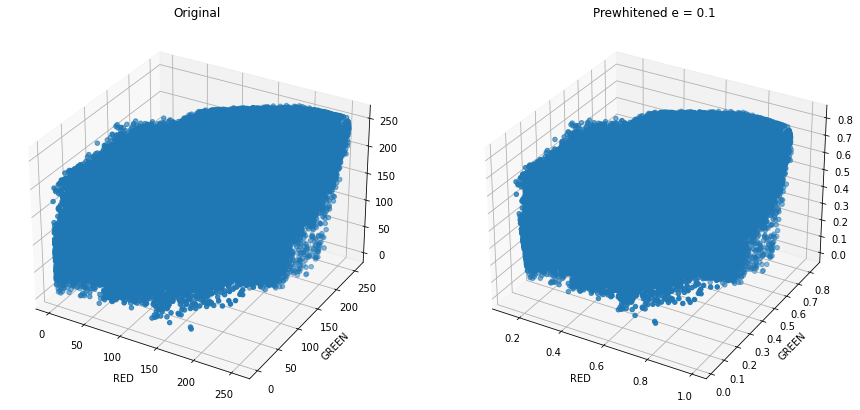

In [4]:
im = cv.imread(cv.samples.findFile("Monet.jpg"))
im_o = im.copy()
im_o[:,:,0] = im[:,:,2]
im_o[:,:,2] = im[:,:,0]
im = im_o
im = im.reshape((-1,3))
pre_whitening(im,0.1,True,im_o.shape);

## Visualización de Datos

Luego decidimos graficar la distribución de los colores con los diferentes métodos de estandarización que nos permitiera mostrar cómo se comportan los datos y a que intensidades de color predominan en la imagen.

In [7]:
# Esta funcion recibe el nombre de una imagen, y dibuja todas las disperciones con las estandarizaciones vistas
# sobre cada combinacion de ejes en 2 dimensiones y la dispercion de los datos en el eje tridimensinal.
def proyec_imgs(image,reduce):
    #Open Image
    im = cv.imread(cv.samples.findFile(f"{image}"))
    im_o = im.copy()
    im_o[:,:,0] = im[:,:,2]
    im_o[:,:,2] = im[:,:,0]
    im = im_o
    
    #Reduce image test
    if reduce:
        scale_percent = 20
        width, height = int(im.shape[1] * scale_percent / 100),int(im.shape[0] * scale_percent / 100)
        im = cv.resize(im,(width,height))
    
    #reshape imagen
    im = im.reshape((-1,3))
    
    #Normalizations
    scaler = StandardScaler().fit(im)
    im_st = scaler.transform(im)
    
    cov = np.cov(im,rowvar=False)
    im_n = np.dot(im,np.linalg.inv(cov))
    
    im_prew = pre_whitening(im,0.1,False)
    #Plots
    norms = [(im,"Normal Data"),(im_st,"Standard Normalization"),(im_n,"COV Normalization"),(im_prew,"Pre-whitening")]
    options = [(0,1,"RED","GREEN"),(0,2,"RED","BLUE"),(1,2,"GREEN","BLUE")]
    
    #Plot 2D scatters
    #for i,label in norms:
    #    plt.figure(figsize = (20,20))
    #    for j in range(3):
    #        plt.subplot(4, 3,j+1,xlabel=options[j][2],ylabel=options[j][3]), plt.scatter(i[:,options[j][0]],i[:,options[j][1]],marker='o')
    #        plt.title(f"{label}")
    #    plt.show()
    
    #Plot 3D scatters
    fig = plt.figure(figsize = (20,5))
    axs = []
    for j in range(len(norms)):
        axs.append(fig.add_subplot(1,len(norms),j+1, projection='3d',xlabel="RED",ylabel="GREEN",title=norms[j][1]))
        axs[j].scatter(norms[j][0][:,0],norms[j][0][:,1],norms[j][0][:,2],marker='o')
    plt.show()

- Puede cambiar los parámetros de la función y correrla si lo desea.

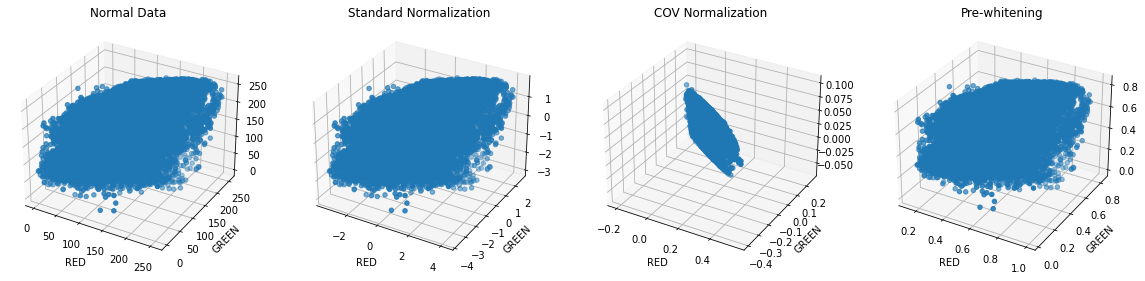

In [10]:
# 1: nombre imgen
# 2: True ---> Reeduce la imagen al 20% de su tamaño ; False ---> Procesa imagen en tamaño original
proyec_imgs("Monet.jpg",True)

- Luego tenemos una función que recibe una imagen, el número de colores que queremos utilizar al pintar, si queremos reducir la imagen para que el algoritmo trabaje más rápido y tres tipos de normalización, "Estandar,Pre-Whitening,Covarianza".

In [19]:
def get_img_one(n_colors,image,reduce,norm):
    print("Imagen %s" %image)
    metrics = []
    #Open Image
    im = cv.imread(cv.samples.findFile(f"{image}"))
    if im is None:
        sys.exit("Could not read the image.")

    #CV2 reads the image on BGR, the we pass to RGB
    im_o = im.copy()
    im_o[:,:,0] = im[:,:,2]
    im_o[:,:,2] = im[:,:,0]
    im = im_o

    #Some image have a huge cuantity of pixels, so we reduce it to a scale% of the original size
    if reduce:
        scale_percent = 20
        width, height = int(im.shape[1] * scale_percent / 100),int(im.shape[0] * scale_percent / 100)
        im = cv.resize(im,(width,height))
        print(f"Image reduced from: {im_o.shape} to {im.shape}")
        im_o = im.copy()

    #Original Shape
    shape_original = im.shape
    print("Resolución de Imagen", shape_original)

    #reshape imagen
    im = im.reshape((-1,3))
    
    #Normalization       
        # standard(data-mean)/var
    if norm == "standard" or norm=="all":
        scaler = StandardScaler().fit(im)
        im_n = scaler.transform(im)
        metrics.append(("standard",aux(image,n_colors,im_n,shape_original,im_o,"standard",scaler)))
        # by covariance matrix
    if norm == "cov" or norm=="all":
    #var = np.std(im,axis=0)**2
        cov = np.cov(im,rowvar=False)
        im_n = np.dot(im,np.linalg.inv(cov))
        metrics.append(("cov",aux(image,n_colors,im_n,shape_original,im_o,"cov",cov)))
        #Pre-whitening
    if norm == "pre-whitening" or norm=="all":
        im_n = pre_whitening(im,0.1,False)
        metrics.append(("pre-whitening",aux(image,n_colors,im_n,shape_original,im_o,"pre-whitening")))
    return metrics

- La función aux se encarga de hacer el procedimiento correspondiente a la clusterización

In [20]:
#get_img_one reciben el nombre de la imagen, el numero de colores para hacer clustering
# una bandera para indicar si se quiere reducir la imagen (util para reducir costo computacional)
# y la tecnica de normalizacion de los datos que se quiere utilizar
# Puede indicar que todas las tecnicas sean utilizadas, para esto se hace un modelo por cada tecnica y se retornan todos los resultados
def aux(image,n_colors,im,shape_original,im_o,norm,norm_param=None):
    print(f"Fitting with {norm} normalization")

    #K-means
    kmeans = KMeans(n_clusters=n_colors).fit(im)

    #Pred
    Pred = kmeans.predict(im)

    #Clusters
    Clusters = np.array(kmeans.cluster_centers_)

    #Reduce color of image
    new_im = np.copy(im)
    for index in range(len(new_im)):
        new_im[index] = Clusters[Pred[index]]

    #Plot Scatter
    fig = plt.figure(figsize = (15,7))
    ax = fig.add_subplot(121, projection='3d',xlabel="RED",ylabel="GREEN",title=f"Normalization: {norm}")
    ax.scatter(Clusters[:,0],Clusters[:,1],Clusters[:,2],marker='o')

    #Inverse transform
    if norm == "standard":
        new_im = norm_param.inverse_transform(new_im).reshape(shape_original).astype(int)
    elif norm =="cov":
        new_im = np.dot(new_im,norm_param).reshape(shape_original).astype(int)
        #new_im = (new_im*var).reshape(shape_original).astype(int)
    else:
        new_im = (new_im*255).reshape(shape_original).astype(int)
    L2 = sum(sum(sum((im_o-new_im)**2)))
    err = np.sum( (im_o.astype("float") - new_im.astype("float")) ** 2)/float(im_o.shape[0] * im_o.shape[1])

    #plot Image
    ax2 = fig.add_subplot(122)
    plt.imshow(new_im)
    plt.title(f"{image} --- L2: {L2} --- MSE: {err:1.4}")
    plt.show()
    return L2,err

- Algo útil a la hora de saber cómo funciona el algoritmo K-means y para soportar nuestros argumentos de variabilidad de colores se encuentra en el siguiente circulo de colores. Donde al haber mayor variabilidad de color, el algoritmo hace la respectiva clusterización de los diferentes colores "representativos".

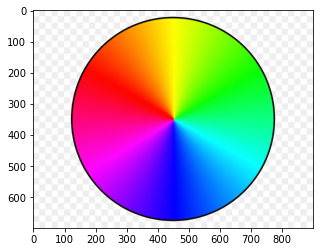

In [17]:
im = cv.imread(cv.samples.findFile(f"circulo.jpg"))
im_o = im.copy()
im_o[:,:,0] = im[:,:,2]
im_o[:,:,2] = im[:,:,0]
plt.imshow(im_o);

Imagen circulo.jpg
Resolución de Imagen (700, 900, 3)
Fitting with standard normalization


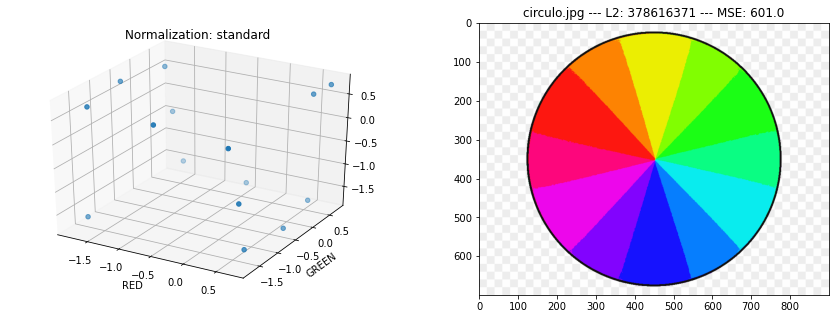

Fitting with cov normalization


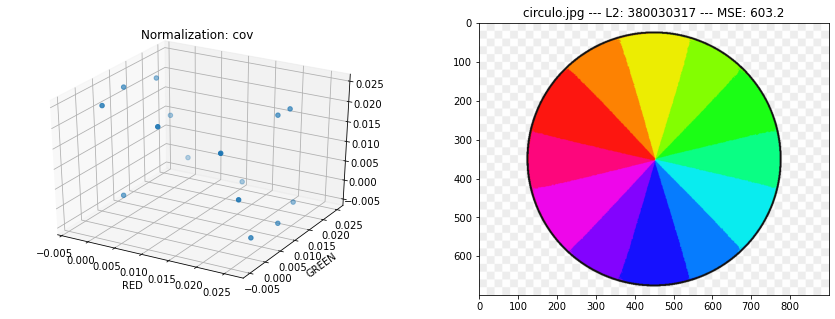

Fitting with pre-whitening normalization


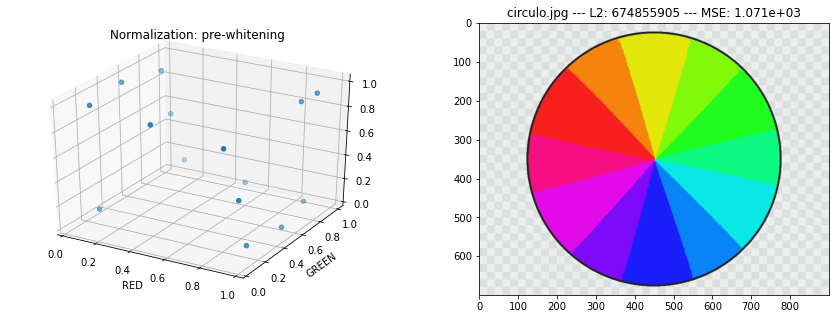

In [16]:
L2 = get_img_one(15,"circulo.jpg",False,'all')

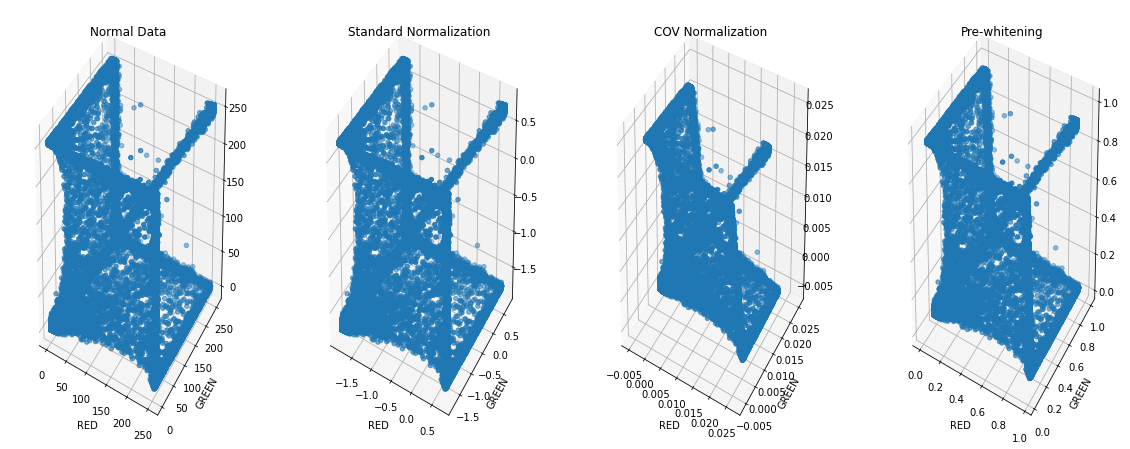

In [14]:
proyec_imgs("circulo.jpg",False)

En la siguiente celda trabajamos particularmente la pintura de Monet para forzar al K-means a detectar el color rojo de las flores.

Imagen Monet.jpg
Resolución de Imagen (1193, 1600, 3)
Fitting with standard normalization


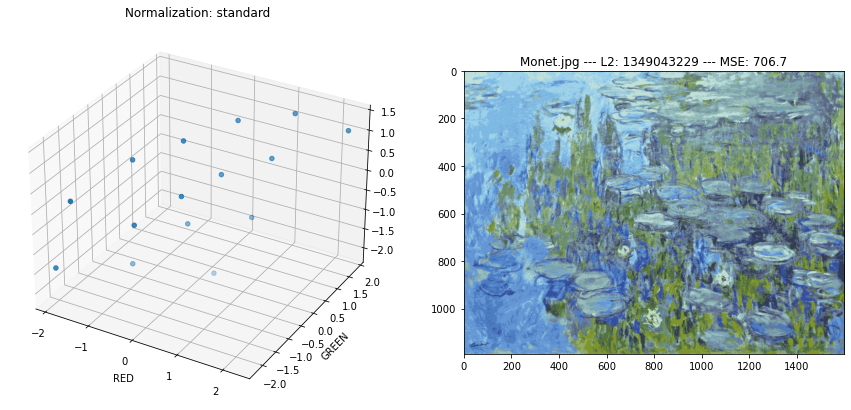

Fitting with cov normalization


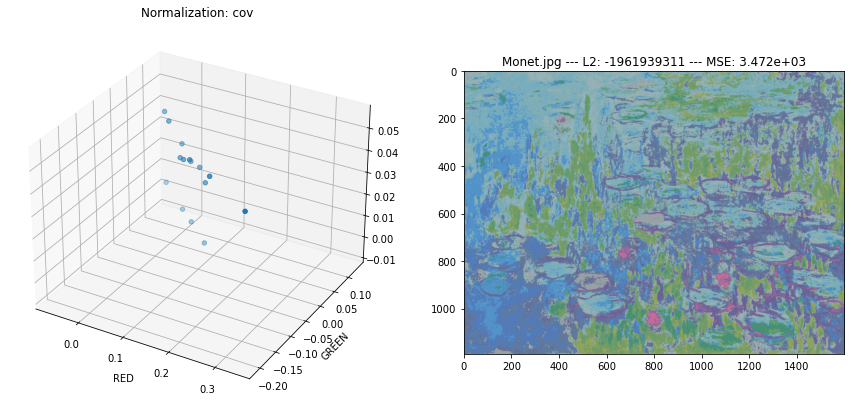

Fitting with pre-whitening normalization


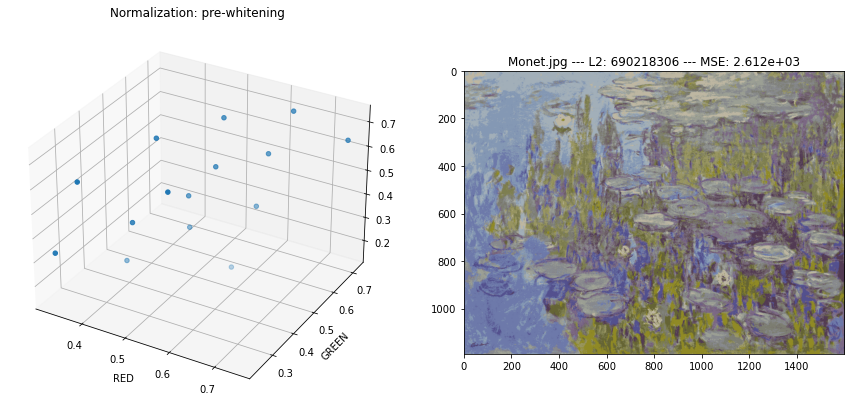

Wall time: 8min 51s


In [52]:
%%time
#Normalization can be ---> 'standard'((data-mean)/var), 'cov'(dot product with (cov_matix)^-1),pre-whitening, 'all'
L2 = get_img_one(15,"Monet.jpg",False,'all')

In [32]:
Tabla = pd.DataFrame(index=['Standard','Cov_Matrix','Pre-Whitening'])
Tabla['Norma L2'] = [f"{i[1][0]/10**7:1.1f}e+7" for i in L2]
Tabla['MSE'] = [f"{i[1][1]/10**7:1.1f}e+7" for i in L2]
Tabla

Norma L2     MSE
Standard        1348820186.0   706.6
Cov_Matrix     -1946311586.0  3480.5
Pre-Whitening    713028825.0  2623.6

## Revisando Todas las Imagenes

En la siguiente funcion iteramos por todas las pinturas utilizando solo 15 colores, donde decidimos utilizar solo normalizacion estandar por que en general tiene el menor costo.

In [33]:
def get_img(n_colors,images):
    L2_s= []
    vec = []
    for image in images:
        print("Analizando la imagen %s" %image)
        
        #Open Image
        im = cv.imread(cv.samples.findFile(f"{image}.jpg"))
        im_o = im.copy()
        im_o[:,:,0] = im[:,:,2]
        im_o[:,:,2] = im[:,:,0]
        im = im_o
        
        if im is None:
            sys.exit("Could not read the image.")
        
        #Original Shape
        shape_original = im.shape
        
        #reshape imagen
        im = im.reshape((-1,3))

        #Normalization
        scaler = StandardScaler().fit(im)
        im = scaler.transform(im)
        
        #KMM
        kmeans = KMeans(n_clusters=n_colors).fit(im)
        
        #Pred
        Pred = kmeans.predict(im)
        
        #Clusters
        Clusters = np.array(kmeans.cluster_centers_)
        
        
        #Reduce color of image
        new_im = np.copy(im)
        for index in range(len(new_im)):
            new_im[index] = Clusters[Pred[index]]
         
        new_im = scaler.inverse_transform(new_im).reshape(shape_original).astype(int)

        L2 = sum(sum(sum((im_o-new_im)**2)))
        err = np.sum((im_o.astype("float") - new_im.astype("float")) ** 2)/float(im_o.shape[0] * im_o.shape[1])
        L2_s.append([L2,err])
        
        #plot
        vec.append((new_im,f"{image} --- L2: {L2} --- MSE: {err}"))
        if(len(vec)==2):
            axes = []
            fig = plt.figure(figsize = (15,15))
            for i in range(2):
                axes.append(fig.add_subplot(1,2,i+1))
                axes[-1].set_title(vec[i][1])
                plt.imshow(vec[i][0])
            vec = []
            plt.show()
    return L2_s

## Utilizando solo tres colores

En la siguiente sección utilizamos solo 3 colores, para ver cómo se reconstruyen las imágenes con solo tres colores y como punto de comparación de como mejorara si utilizamos 15 colores.

Analizando la imagen Bosch
Analizando la imagen Boticelli


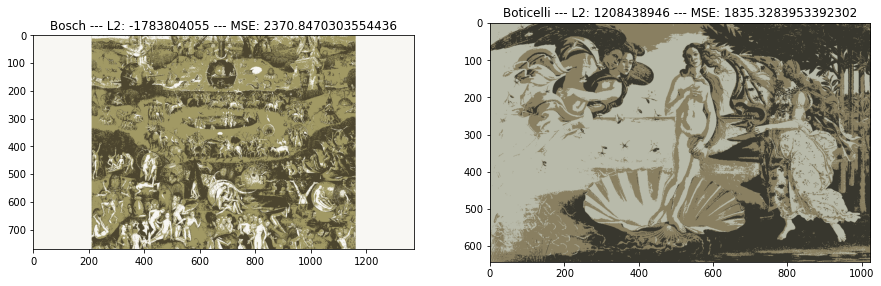

Analizando la imagen Dali
Analizando la imagen Monet


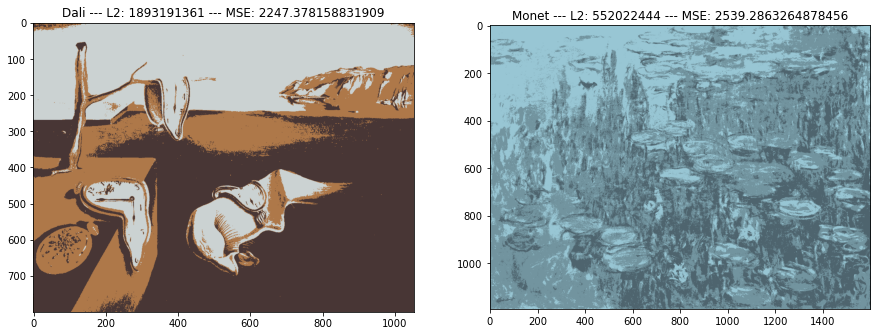

Analizando la imagen Picaso
Analizando la imagen VanGogh


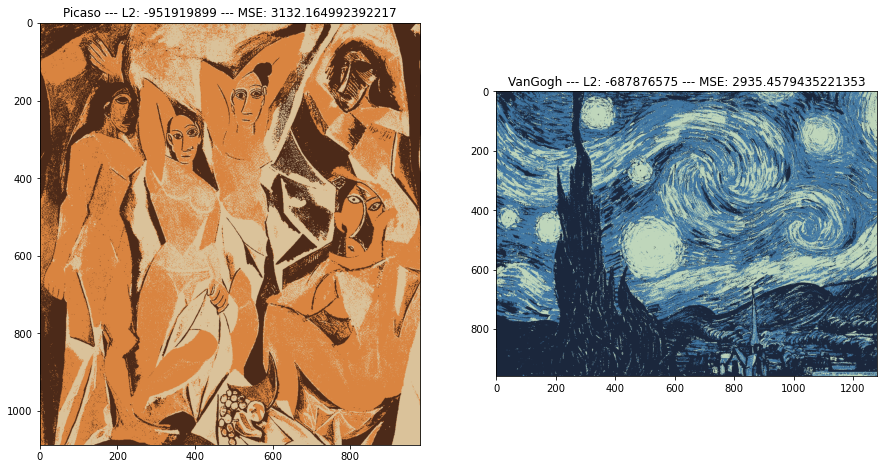

Analizando la imagen Velazquez
Analizando la imagen Vermeer


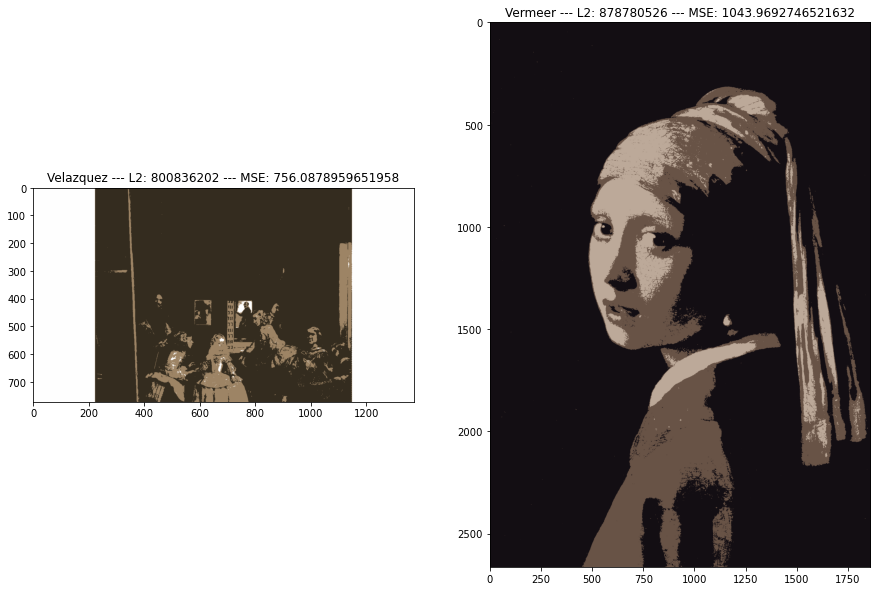

Wall time: 2min 32s


In [38]:
%%time
images = ["Bosch","Boticelli","Dali","Monet","Picaso","VanGogh","Velazquez","Vermeer"]
L23 = get_img(3,images)

## Pinturas con 15 colores

Ahora miremos que pasa con los 15 colores que necesita el estudiante de pintura

Analizando la imagen Bosch
Analizando la imagen Boticelli


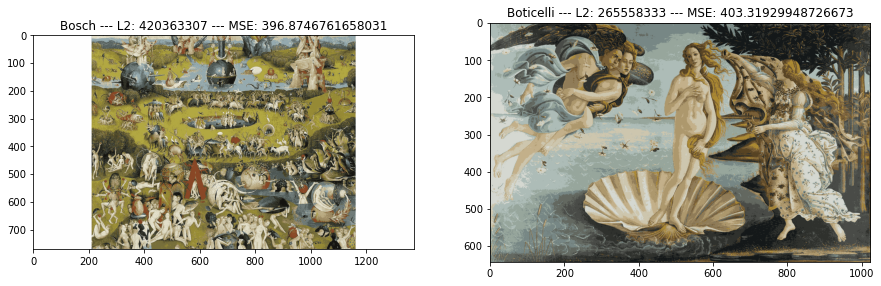

Analizando la imagen Dali
Analizando la imagen Monet


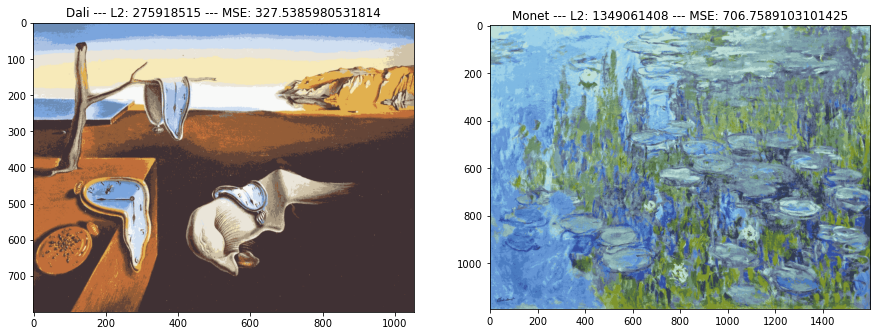

Analizando la imagen Picaso
Analizando la imagen VanGogh


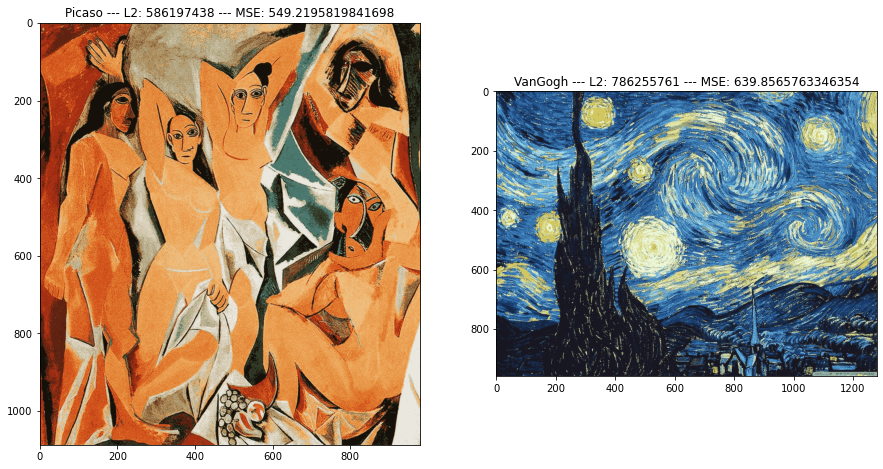

Analizando la imagen Velazquez
Analizando la imagen Vermeer


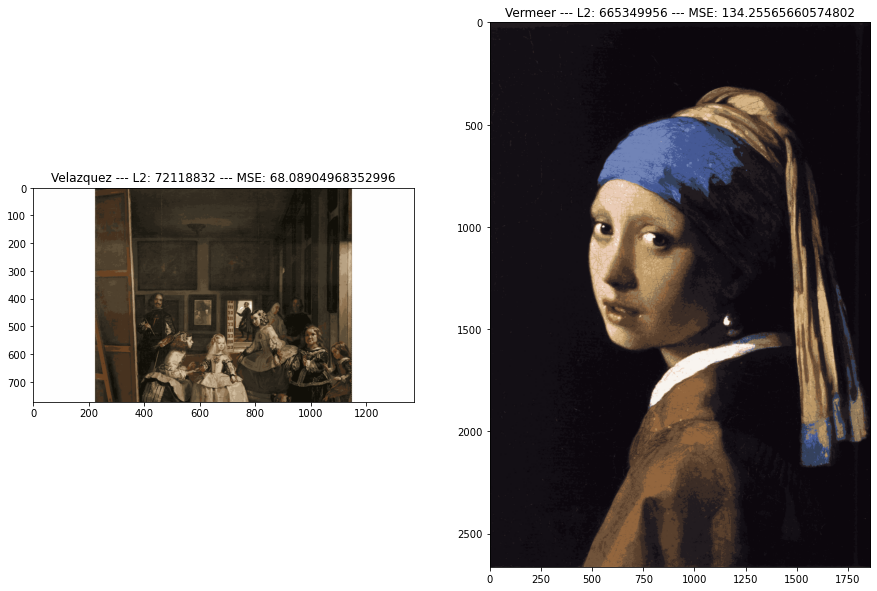

Wall time: 13min 51s


In [41]:
%%time
L215 = get_img(15,images)

In [50]:
Tabla = pd.DataFrame(index=images)
Tabla['Norma L2'] = [f"{i[0]/10**7:1.1f}e+7" for i in L23]
Tabla['MSE'] = [f"{i[1]:1.1f}" for i in L23]
Tabla.T

Bosch Boticelli      Dali    Monet    Picaso   VanGogh  \
Norma L2  -178.4e+7  120.8e+7  189.3e+7  55.2e+7  -95.2e+7  -68.8e+7   
MSE          2370.8    1835.3    2247.4   2539.3    3132.2    2935.5   

         Velazquez  Vermeer  
Norma L2   80.1e+7  87.9e+7  
MSE          756.1   1044.0

In [51]:
Tabla2 = pd.DataFrame(index=images)
Tabla2['Norma L2'] = [f"{i[0]/10**7:1.1f}e+7" for i in L215]
Tabla2['MSE'] = [f"{i[1]:1.1f}" for i in L215]
Tabla2.T

Bosch Boticelli     Dali     Monet   Picaso  VanGogh Velazquez  \
Norma L2  42.0e+7   26.6e+7  27.6e+7  134.9e+7  58.6e+7  78.6e+7    7.2e+7   
MSE         396.9     403.3    327.5     706.8    549.2    639.9      68.1   

          Vermeer  
Norma L2  66.5e+7  
MSE         134.3